In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Reemplaza 'ruta/al/archivo.parquet' con la ruta de tu archivo .parquet
df = pd.read_parquet("./2024.parquet")
df

,cantidad_de_filas,agnio,region_destino,region_nacionalidad,entrada_salida,sexo,categoria_migratoria,motivo_viaje,departamento_hospedaje,ciudad_hospedaje,colombiano_extranjero,puesto_migratorio,tipo_transporte,centro_regional,pais_nacionalidad,meses,pais_destino_procedencia,rango_edad,departamento,tipo_viajero
0,1,2024,América del Norte,América del Norte,Entradas,Femenino,Turismo,Turismo,Caquetá,Albania,Extranjeros,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Estados Unidos,Agosto,Estados Unidos,30-39,Bogotá,Visitante
1,1,2024,América del Norte,América del Norte,Entradas,Femenino,Turismo,Turismo,Norte de Santander,Abrego,Extranjeros,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Estados Unidos,Agosto,Estados Unidos,30-39,Bogotá,Visitante
2,1,2024,América del Norte,América del Norte,Entradas,Femenino,Turismo,Turismo,Norte de Santander,Cácota,Extranjeros,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Estados Unidos,Agosto,Estados Unidos,30-39,Bogotá,Visitante
3,1,2024,América del Norte,América del Norte,Entradas,Femenino,Turismo,Turismo,Quindío,Salento,Extranjeros,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Estados Unidos,Agosto,Estados Unidos,30-39,Bogotá,Visitante
4,1,2024,América del Norte,América del Norte,Entradas,Femenino,Turismo,Turismo,Risaralda,Santa Rosa de Cabal,Extranjeros,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Estados Unidos,Agosto,Estados Unidos,30-39,Bogotá,Visitante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306886,1,2024,Europa,América del Sur,Entradas,Masculino,Sin Especificar,Turismo,No Aplica,No Aplica,Colombianos,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Colombia,Septiembre,República de Irlanda,50-59,Bogotá,Visitante
1306887,1,2024,Europa,América del Sur,Entradas,Masculino,Sin Especificar,Turismo,No Aplica,No Aplica,Colombianos,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Colombia,Septiembre,Suecia,50-59,Bogotá,Visitante
1306888,1,2024,Europa,América del Sur,Entradas,Masculino,Sin Especificar,Residente,Antioquia,Medellín,Colombianos,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Colombia,Septiembre,Bélgica,50-59,Antioquía,Residente
1306889,220,2024,Europa,América del Sur,Entradas,Masculino,Sin Especificar,Residente,Antioquia,Medellín,Colombianos,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Colombia,Septiembre,España,50-59,Antioquía,Residente


In [161]:
# le_entradas_salidas= LabelEncoder()
# le_entradas_salidas.fit(df["entrada_salida"])
# df["entrada_salida_b"]=le_entradas_salidas.transform(df["entrada_salida"])
# # filtrar: categoria_migratoria, motivo_viaje ( ue se cuece), ciudad_hospedaje
# #pais_nacionalidad onehot
columnas=["sexo","pais_nacionalidad", "meses", "rango_edad"]
df_filtrado=df[(df["categoria_migratoria"]=="Turismo") & (df["ciudad_hospedaje"]=="Medellín")]


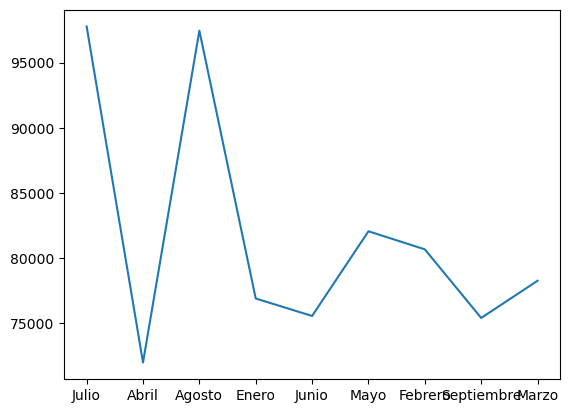

In [162]:
a = {}
for mes in set(df_filtrado["meses"].values):
    a[mes] =  df_filtrado[df_filtrado["meses"]==mes]["cantidad_de_filas"].sum()
plt.plot(a.keys(), a.values())

In [ ]:
#LABEL ENCODER
# filtrar: categoria_migratoria, motivo_viaje ( ue se cuece), ciudad_hospedaje
#pais_nacionalidad onehot
columnas=["sexo","pais_nacionalidad"]
for columna in columnas:
    le= LabelEncoder()
    le.fit(df_filtrado[columna])
    df_filtrado[columna]=le.transform(df_filtrado[columna])
    
df_filtrado["rango_edad"] = df_filtrado["rango_edad"].apply(lambda x: int(x[:2].strip("-")))
df_filtrado

,cantidad_de_filas,agnio,region_destino,region_nacionalidad,entrada_salida,sexo,categoria_migratoria,motivo_viaje,departamento_hospedaje,ciudad_hospedaje,...,tipo_viajero,meses_Abril,meses_Agosto,meses_Enero,meses_Febrero,meses_Julio,meses_Junio,meses_Marzo,meses_Mayo,meses_Septiembre
0,27,2024,América del Norte,América del Norte,Entradas,0,Turismo,Turismo,Antioquia,Medellín,...,Visitante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2024,América del Norte,América del Norte,Entradas,0,Turismo,Negocios,Antioquia,Medellín,...,Visitante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73,2024,América del Norte,América del Norte,Entradas,0,Turismo,Turismo,Antioquia,Medellín,...,Visitante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,2024,América Central y el Caribe,América Central y el Caribe,Entradas,0,Turismo,Negocios,Antioquia,Medellín,...,Visitante,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2024,América Central y el Caribe,América Central y el Caribe,Entradas,0,Turismo,Negocios,Antioquia,Medellín,...,Visitante,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61617,54,2024,América del Sur,América del Sur,Entradas,0,Turismo,Turismo,Antioquia,Medellín,...,Visitante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61618,1,2024,América del Sur,América del Sur,Entradas,0,Turismo,Turismo,Antioquia,Medellín,...,Visitante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61619,1,2024,América del Sur,América del Sur,Entradas,2,Turismo,Residente,Antioquia,Medellín,...,Residente,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61620,1,2024,Europa,América del Sur,Entradas,2,Turismo,Turismo,Antioquia,Medellín,...,Visitante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_filtrado["rango_edad"].value_counts()

rango_edad
30    15228
18    13010
40    11387
50     8696
60     5824
0      4428
70     3049
Name: count, dtype: int64

<Axes: >

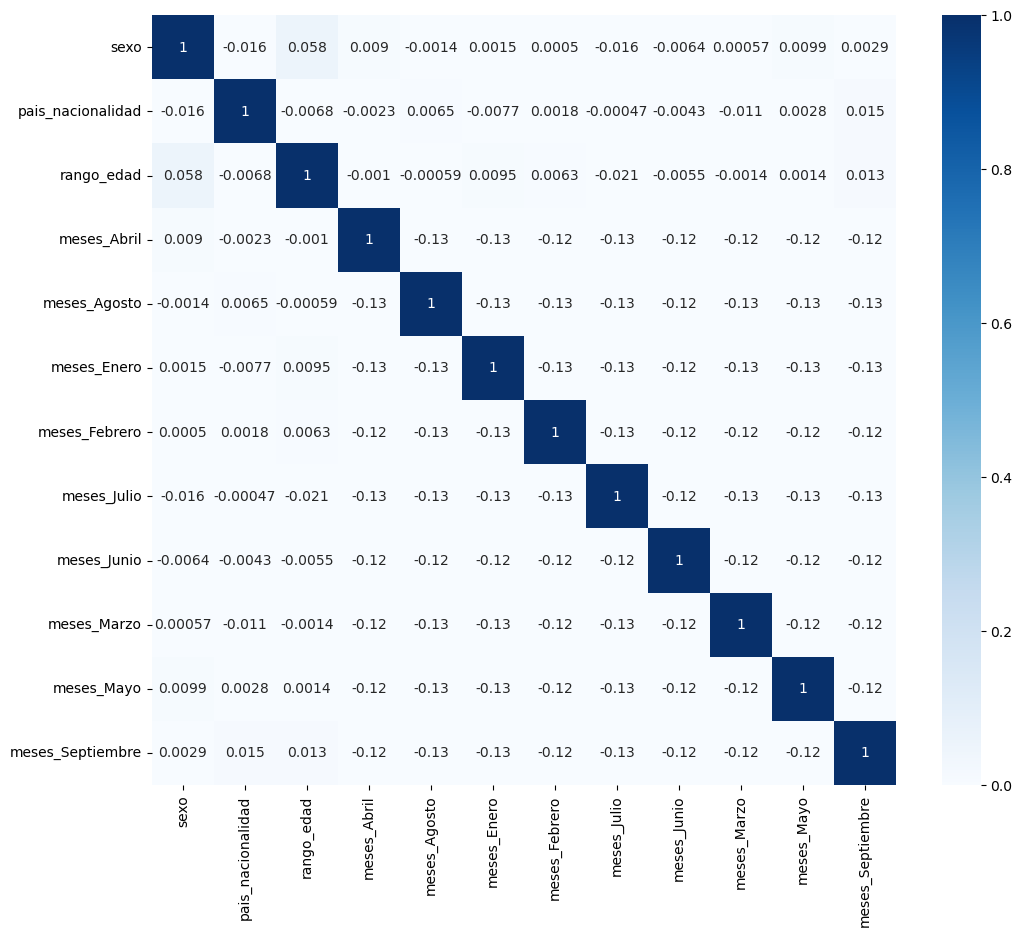

In [ ]:
dejar = columnas + ["rango_edad", "meses_Abril","meses_Agosto","meses_Enero","meses_Febrero","meses_Julio","meses_Junio","meses_Marzo","meses_Mayo","meses_Septiembre"]
plt.figure(figsize=(12, 10))
sns.heatmap(df_filtrado[dejar].corr(), cmap="Blues", vmin=0, vmax=1, annot = True)

In [167]:
a = {}
for mes in set(df_filtrado["meses"].values):
    a[mes] =  df_filtrado[df_filtrado["meses"]==mes]["cantidad_de_filas"].sum()


In [168]:
a

{'Julio': 97765,
 'Abril': 71995,
 'Agosto': 97447,
 'Enero': 76901,
 'Junio': 75563,
 'Mayo': 82058,
 'Febrero': 80672,
 'Septiembre': 75410,
 'Marzo': 78264}

<Axes: >

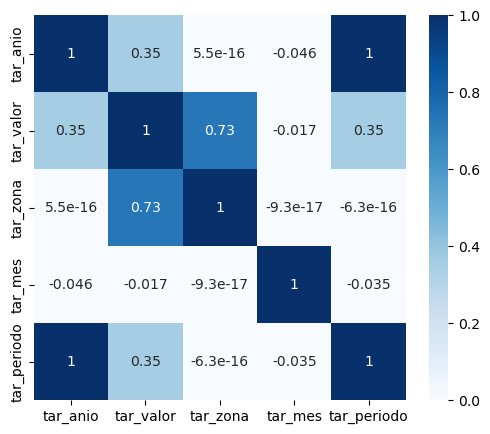

In [169]:
df_tarifas=pd.read_csv("./tarifa_promedio_mensual_por_zona_en_pesos_colombianos.csv")
le_tarifas= LabelEncoder()
le_tarifas.fit(df_tarifas["tar_zona"])
df_tarifas["tar_zona"]=le_tarifas.transform(df_tarifas["tar_zona"])
#202209
df_tarifas["tar_anio"]=df_tarifas["tar_periodo"].apply(lambda x: x//100)
df_tarifas["tar_mes"]=df_tarifas["tar_periodo"].apply(lambda x:x%100)

dejar = ["tar_anio", "tar_valor", "tar_zona", "tar_mes", "tar_periodo"]
plt.figure(figsize=(6, 5))
sns.heatmap(df_tarifas[dejar].corr(), cmap="Blues", vmin=0, vmax=1, annot = True)

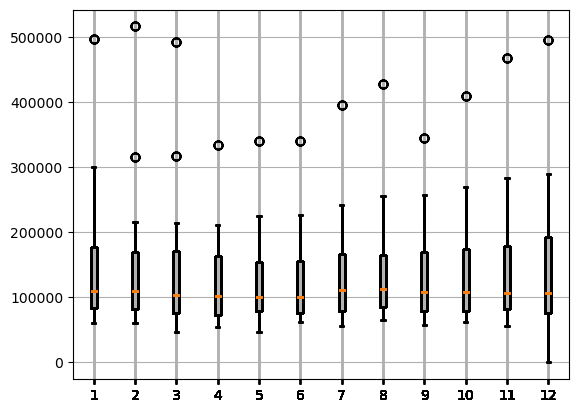

In [170]:
for mes in df_tarifas["tar_mes"]:
    plt.boxplot(df_tarifas[df_tarifas["tar_mes"] == mes]["tar_valor"], positions=[mes])
    plt.grid(True)
    
#no nos importa

<Axes: >

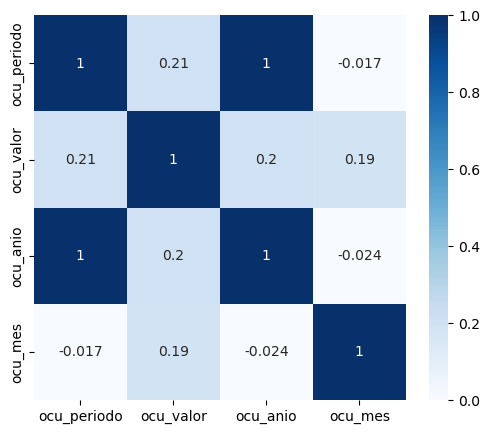

In [171]:
#OCUPACION HOTELES POR PERIODOS
df_ocupacion=pd.read_csv("./porcentaje_ocupacion_hotelera_mensual_de_medellin (1).csv")
#ocu_periodo,ocu_valor
plt.figure(figsize=(6, 5))
df_ocupacion["ocu_anio"]=df_ocupacion["ocu_periodo"].apply(lambda x: x//100)
df_ocupacion["ocu_mes"]=df_ocupacion["ocu_periodo"].apply(lambda x:x%100)

sns.heatmap(df_ocupacion[["ocu_periodo","ocu_valor", "ocu_anio", "ocu_mes"]].corr(), cmap="Blues", vmin=0, vmax=1, annot = True)

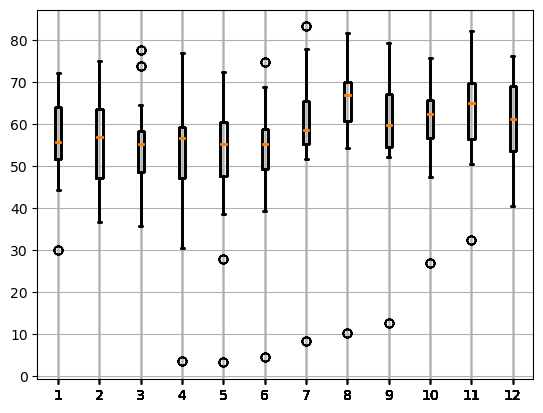

In [172]:
for mes in df_ocupacion["ocu_mes"]:
    plt.boxplot(df_ocupacion[df_ocupacion["ocu_mes"] == mes]["ocu_valor"], positions=[mes])
    plt.grid(True)

In [10]:
#DE LOS COMERCIANTES
df_comerciantes=pd.read_csv("./comerciantes_informales_sensibilizados.csv")
#le_comerciantes=LabelEncoder()
#le_tarifas.fit(df_comerciantes["tar_zona"])
df_comerciantes=df_comerciantes.dropna()
columnas_comerciantes=["sexo","cabeza_de_hogar", "caracterizacion_ciudadano", "barrio_vereda_ciudadano", "comuna_ciudadano", "zona_ciudadano"]
for columna in columnas_comerciantes:
    #df_comerciantes[columna]=df_comerciantes[columna].fillna(df[columna].mean())
    le= LabelEncoder()
    le.fit(df_comerciantes[columna])
    df_comerciantes[columna]=le.transform(df_comerciantes[columna])
df_comerciantes.sample(10)

,edad,sexo,cabeza_de_hogar,caracterizacion_ciudadano,tipo_de_emprendimiento,idea_de_negocio,estrato,barrio_vereda_ciudadano,comuna_ciudadano,zona_ciudadano,fecha_de_beneficio_dia,fecha_de_beneficio_mes,fecha_de_beneficio_año
206,61.0,1,1,0,no dato,no dato,2.0,40,2,3,31,7,2017.0
1096,69.0,1,1,0,no dato,no dato,2.0,18,7,1,10,8,2017.0
324,37.0,0,1,0,no dato,no dato,2.0,48,0,3,18,8,2017.0
921,53.0,1,0,0,no dato,no dato,3.0,44,15,4,16,8,2017.0
104,66.0,1,1,0,no dato,no dato,1.0,22,0,3,11,7,2017.0
1044,68.0,1,1,0,no dato,no dato,2.0,64,1,3,19,9,2017.0
442,64.0,1,1,0,no dato,no dato,2.0,14,5,2,5,9,2017.0
913,33.0,1,1,1,no dato,no dato,1.0,47,5,2,16,8,2017.0
962,32.0,1,1,0,no dato,no dato,1.0,44,15,4,30,8,2017.0
764,56.0,0,1,0,no dato,no dato,1.0,44,15,4,30,8,2017.0


In [11]:
df_comerciantes[df_comerciantes.columns].isnull().sum()*100/df_comerciantes.shape[0]
df_comerciantes[df_comerciantes.columns].isnull().sum()

edad                         0
sexo                         0
cabeza_de_hogar              0
caracterizacion_ciudadano    0
tipo_de_emprendimiento       0
idea_de_negocio              0
estrato                      0
barrio_vereda_ciudadano      0
comuna_ciudadano             0
zona_ciudadano               0
fecha_de_beneficio_dia       0
fecha_de_beneficio_mes       0
fecha_de_beneficio_año       0
dtype: int64

<Axes: >

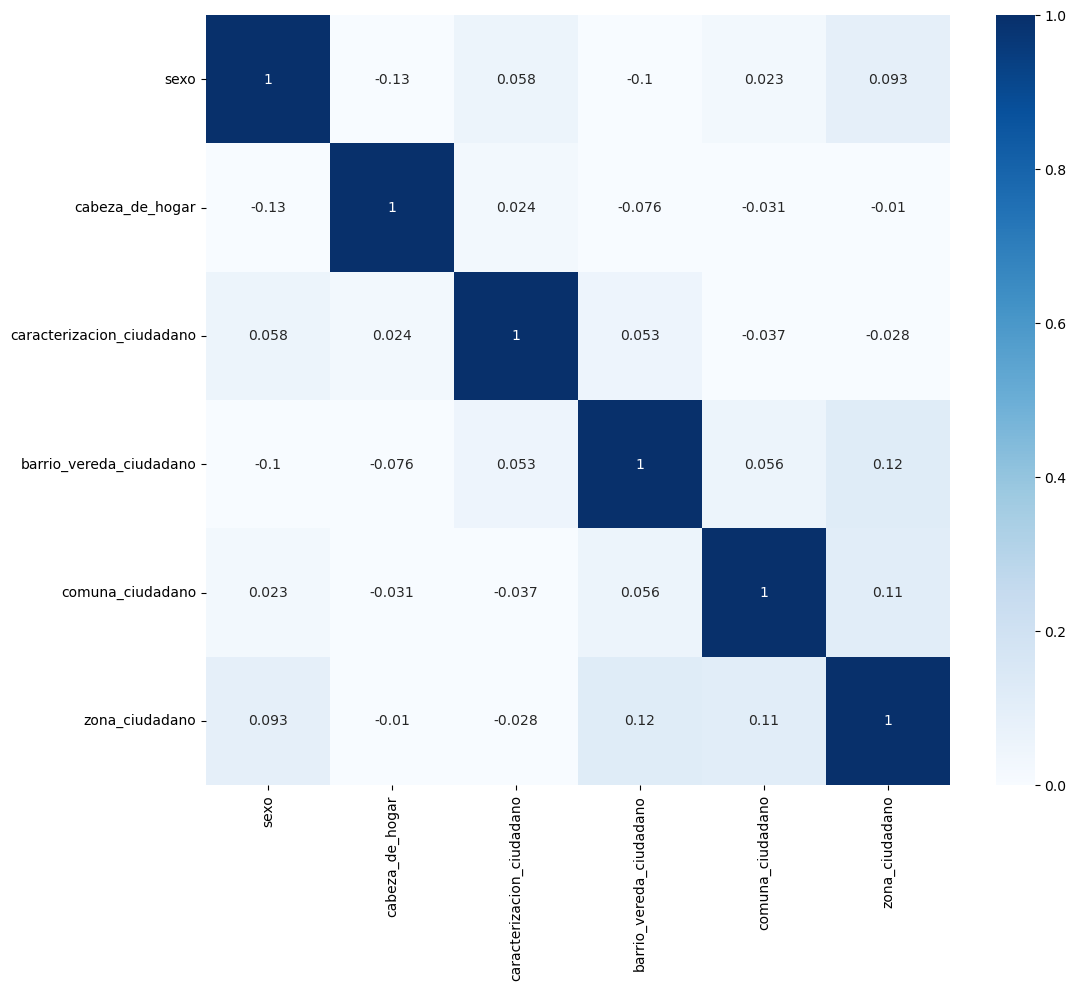

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_comerciantes[columnas_comerciantes].corr(), cmap="Blues", vmin=0, vmax=1, annot = True)


**Atractivos del GitHub**

In [41]:
df_atractivos = pd.read_parquet("./DATA/parquet/atractivos.parquet")
#df_atractivos["atractivo"].value_counts()
df_atractivos

,marca_temporal,puntuacion,mes,atractivo,ingresos_asistentes,ingresos_nacionales,ingresos_internacionales,agnio
0,2023-08-04 11:38:01.530,0.0,Julio,Parque Norte,34039.0,NaN,NaN,NaN
1,2023-08-07 14:03:42.341,0.0,Julio,Parque Arví,91534.0,84681.0,6853.0,NaN
2,2023-08-11 10:00:00.381,0.0,Julio,Jardín Botánico,83631.0,77102.0,6529.0,NaN
3,2023-09-01 12:28:22.516,0.0,Julio,Museo del Agua,5527.0,NaN,NaN,NaN
4,2023-09-01 12:39:50.286,0.0,Julio,Parque Explora,56149.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
304,2024-10-22 14:10:14.325,0.0,Septiembre,Museo de Arte Moderno,7632.0,54.0,46.0,2024.0
305,2024-10-22 15:04:17.574,0.0,Junio,Museo Cementerio San Pedro,1089.0,NaN,NaN,2024.0
306,2024-10-22 15:05:28.545,0.0,Julio,Museo Cementerio San Pedro,1057.0,NaN,NaN,2024.0
307,2024-10-22 15:05:59.673,0.0,Agosto,Museo Cementerio San Pedro,1260.0,NaN,NaN,2024.0


In [ ]:
df_agrupado=df_atractivos.groupby('atractivo')['ingresos_internacionales'].sum().sort_values(ascending=False)
top5_atracciones=list(df_agrupado.head(5).keys())
df_agrupado.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Suma de Valores')
plt.title('Suma de Valores por Categoría')
plt.show()

['Escaleras comuna 13',
 'Parque Arví',
 'Jardín Botánico',
 'Parque Explora',
 'Parque Norte']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11344\3070880207.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atraccion["marca_temporal_mes"] = df_atraccion["marca_temporal"].apply(lambda x: int(x.split("-")[1]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11344\3070880207.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atraccion["marca_temporal_anio"] = df_atraccion["marca_temporal"].apply(lambda x: int(x.split("-")[0]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11344\3070880207.py:11: 

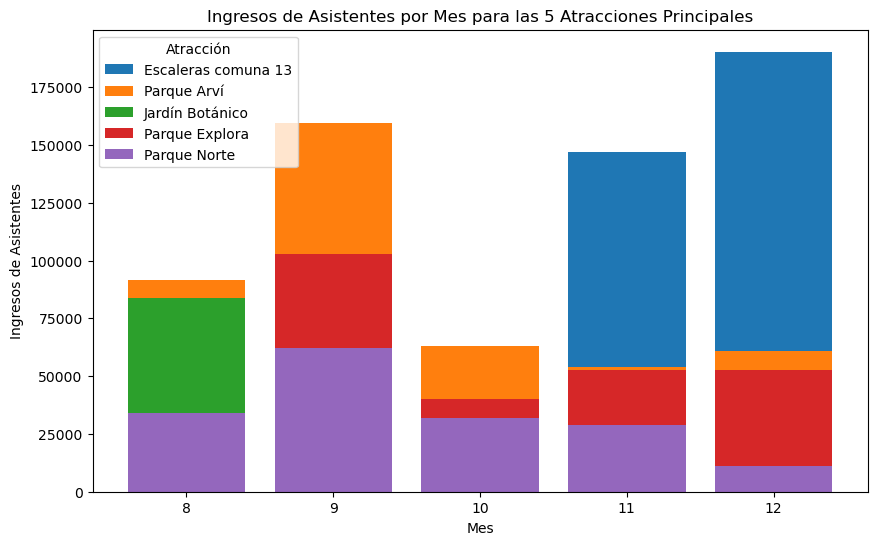

In [47]:
import matplotlib.pyplot as plt

# Lista de las cinco atracciones principales
top5_atracciones = list(df_agrupado.head(5).keys())

# Crear una figura
plt.figure(figsize=(10, 6))

for atraccion in top5_atracciones:
    df_atraccion = df_atractivos[df_atractivos["atractivo"] == atraccion]
    df_atraccion["marca_temporal_mes"] = df_atraccion["marca_temporal"].apply(lambda x: int(x.split("-")[1]))
    df_atraccion["marca_temporal_anio"] = df_atraccion["marca_temporal"].apply(lambda x: int(x.split("-")[0]))
    df_agrupado_mes = df_atraccion[df_atraccion["marca_temporal_anio"] == 2023].groupby("marca_temporal_mes")["ingresos_asistentes"].sum()
    
    # Graficar para cada atracción
    plt.bar(df_agrupado_mes.index, df_agrupado_mes.values, label=atraccion)

plt.xlabel("Mes")
plt.ylabel("Ingresos de Asistentes")
plt.title("Ingresos de Asistentes por Mes para las 5 Atracciones Principales")
plt.legend(title="Atracción")
plt.show()


Ocupación por mes de la comuna 13:


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11344\3540831439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comuna13["marca_temporal_mes"]=df_comuna13["marca_temporal"].apply(lambda x:int(x.split("-")[1]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11344\3540831439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comuna13["marca_temporal_anio"]=df_comuna13["marca_temporal"].apply(lambda x:int(x.split("-")[0]))


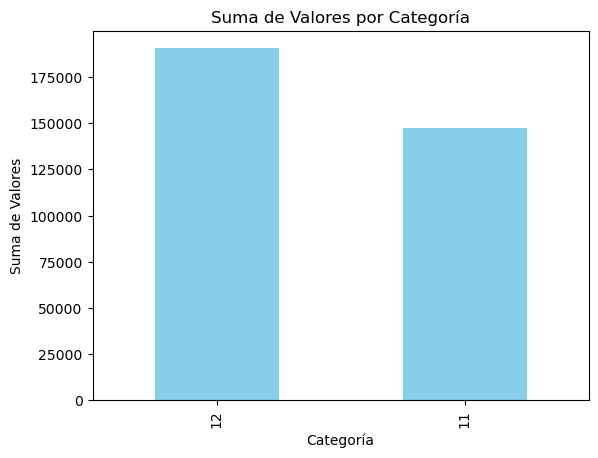

In [31]:
df_comuna13=df_atractivos[df_atractivos["atractivo"]=="Escaleras comuna 13"]
df_comuna13["marca_temporal_mes"]=df_comuna13["marca_temporal"].apply(lambda x:int(x.split("-")[1]))
df_comuna13["marca_temporal_anio"]=df_comuna13["marca_temporal"].apply(lambda x:int(x.split("-")[0]))
df_agrupado_mes=df_comuna13[df_comuna13["marca_temporal_anio"]==2023].groupby("marca_temporal_mes")["ingresos_asistentes"].sum().sort_values(ascending=False)
df_agrupado_anio=df_comuna13.groupby("marca_temporal_anio")["ingresos_asistentes"].sum().sort_values(ascending=False)

df_agrupado_mes.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Suma de Valores')
plt.title('Suma de Valores por Categoría')
plt.show()

In [28]:
"2023-11-08 16:48:13.177".split('-')[1]

'11'

**Hoteles del GitHub**

In [15]:
df_hoteles=pd.read_parquet("./Hotels.parquet")
df_hoteles

,sustainability_level,hotel_groupings,name,stars,latitude,longitude,id
0,bronze,338,33 Hotel,3,6.239041,-75.588844,hserdh
1,None,342,4 Sur Hotel,3,6.205673,-75.583824,hskbus
2,silver,340,61Prado Hotel,3,6.258949,-75.563960,sehkh
3,bronze,336,Alcazar de Oviedo by EE Hoteles,3,6.200274,-75.575770,sehbr
4,silver,337,Almaviva Casa Hotel,3,6.251861,-75.586720,suabas
...,...,...,...,...,...,...,...
210,gold,336,Park 10 Hotel,4,6.211838,-75.565384,sehsr
211,silver,336,Royal Living,4,6.213100,-75.570630,hskbua
212,gold,336,Selina Medellin,4,6.207796,-75.564200,suabbh
213,bronze,343,The Morgana Poblado Suites Hotel,4,6.217619,-75.561424,sehhs
